NHÓM 16:
1. NGUYỄN TRƯỜNG SƠN (NHÓM TRƯỞNG)
2. LƯU THỊ HIỀN

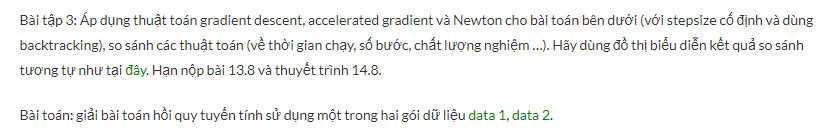

**1. DATA UNDERSTANDING & CLEANING LOAD DATA**

In [464]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [465]:
import pandas as pd 
data=pd.read_csv('kc_house_data.csv')

In [466]:
#Overview of dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


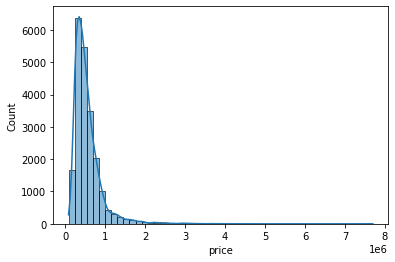

In [467]:
#Kiểm tra phân phối của biến price bằng histogram
sn.histplot(data['price'], kde = True, bins = 50)

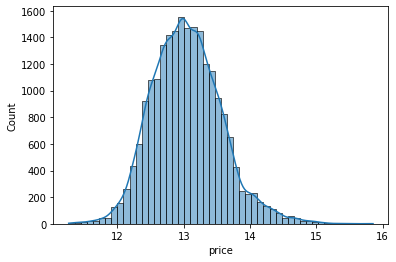

In [468]:
#Kiểm tra phân phối của biến log(price) bằng histogram
sn.histplot(np.log(data['price']), kde = True, bins = 50)

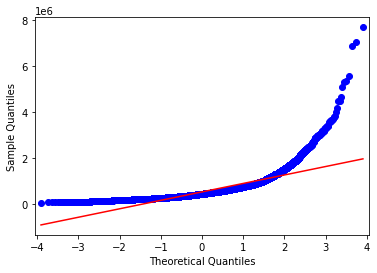

In [469]:
#Kiểm tra phân phối của biến price bằng qq plot
from statsmodels.graphics.gofplots import qqplot
qqplot((data['price']), line='s')
plt.show()

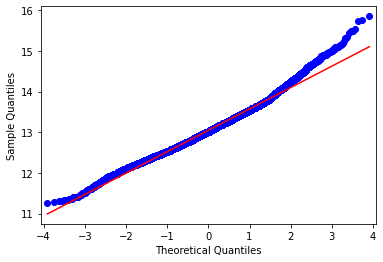

In [470]:
#Kiểm tra phân phối của biến log(price) bằng qq plot 
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(data['price']), line='s')
plt.show()

In [471]:
#Kiem tra pp chuẩn của biến price bằng shapiro test: pvalue = 0 <0.05 => bác bỏ H0: biến price có pp chuẩn
from scipy import stats
shapiro_test1 = stats.shapiro(data['price'])
shapiro_test1


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.7117754220962524, 0.0)

In [472]:
#Kiem tra pp chuẩn của biến log(price) bằng shapiro test: pvalue  > 0.05 => chấp nhận H0: biến price có pp chuẩn
from scipy import stats
shapiro_test2 = stats.shapiro( np.log(data['price']))
shapiro_test2

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9890983700752258, 4.54173567288117e-37)

In [473]:
data['log_price'] = np.log(data['price'])

In [474]:
#Check null
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
log_price        0
dtype: int64

In [475]:
#Data type
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
log_price        float64
dtype: object

Fix lỗi dữ liệu bathrooms bằng cách làm tròn số, còn số tầng = 1.5 hoặc 3.5 thì cũng có thể chấp nhận và hiểu là 1 tầng trệt của căn nhà

In [476]:
#Các giá trị bathrooms bị lỗi, không phải số nguyên
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [477]:
#Kiểm trị giá trị floors không phải số nguyên
data['floors'].unique()
#Có các giá trị 1.5; 2.5 và 3.5

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [478]:
#Làm tròn với những trường hợp bathrooms là số thập phân
data['bathrooms'] = np.rint(data['bathrooms'])

In [479]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,12/9/2014,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166


**TƯƠNG QUAN GIỮA CÁC BIẾN**

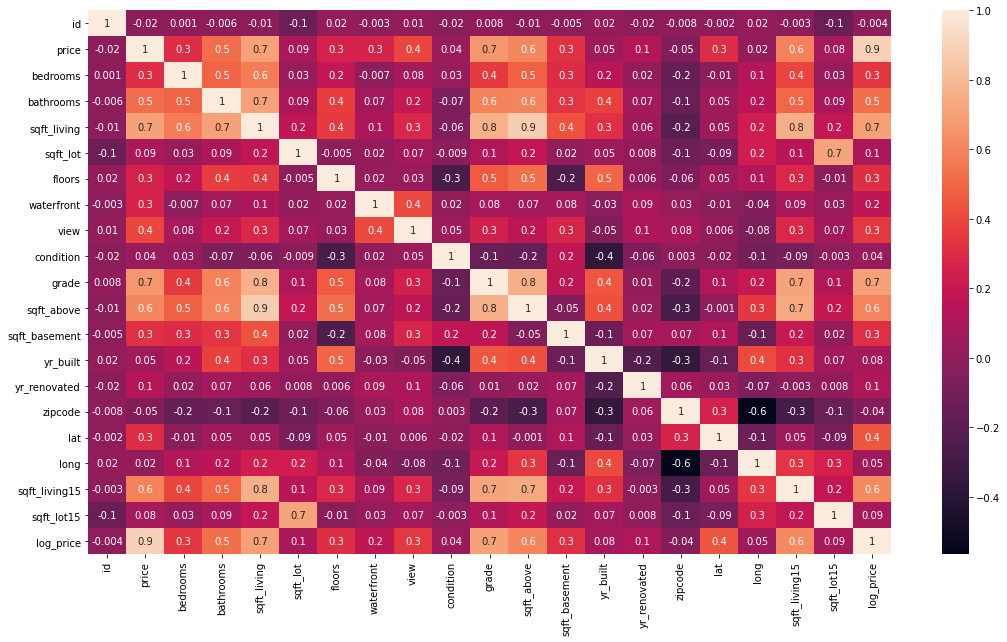

In [480]:
fig = plt.gcf()
fig.set_size_inches(18, 10)
sn.heatmap(data.corr(), annot = True, fmt='.1g')

In [481]:
features = data.corr()['log_price'].reset_index()
features.head()

,index,log_price
0,id,-0.003751
1,price,0.891745
2,bedrooms,0.343360
3,bathrooms,0.526157
4,sqft_living,0.695185


In [482]:
#Chỉ giữ lại các features có cor > 0.5
selected_features = features[features['log_price']>= 0.5]['index'].tolist()
selected_features

['price',
 'bathrooms',
 'sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'log_price']

In [483]:
#Chỉ giữ lại các features có cor > 0.5
data_new = data[selected_features].drop(columns = 'price')

In [484]:
data_new.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15,log_price
0,1.0,1180,7,1180,1340,12.309982
1,2.0,2570,7,2170,1690,13.195614
2,1.0,770,6,770,2720,12.100712
3,3.0,1960,7,1050,1360,13.311329
4,2.0,1680,8,1680,1800,13.142166


**BUILD BASELINE MODEL**

In [485]:
x_train, x_test, y_train, y_test =  train_test_split(data_new.iloc[:, : 5],  data_new.iloc[:, 5], test_size = 0.25, random_state = 42)

In [486]:
#NORMALIZE DATA
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [487]:
#Tổ hợp các model con của bài toán
combs = []
selected_features_new = [ e for e in selected_features if e not in ['price', 'log_price']]
for i in range(1, len(selected_features_new) +1):
      combs.extend(list(combinations(selected_features_new,i)))
combs   

[('bathrooms',),
 ('sqft_living',),
 ('grade',),
 ('sqft_above',),
 ('sqft_living15',),
 ('bathrooms', 'sqft_living'),
 ('bathrooms', 'grade'),
 ('bathrooms', 'sqft_above'),
 ('bathrooms', 'sqft_living15'),
 ('sqft_living', 'grade'),
 ('sqft_living', 'sqft_above'),
 ('sqft_living', 'sqft_living15'),
 ('grade', 'sqft_above'),
 ('grade', 'sqft_living15'),
 ('sqft_above', 'sqft_living15'),
 ('bathrooms', 'sqft_living', 'grade'),
 ('bathrooms', 'sqft_living', 'sqft_above'),
 ('bathrooms', 'sqft_living', 'sqft_living15'),
 ('bathrooms', 'grade', 'sqft_above'),
 ('bathrooms', 'grade', 'sqft_living15'),
 ('bathrooms', 'sqft_above', 'sqft_living15'),
 ('sqft_living', 'grade', 'sqft_above'),
 ('sqft_living', 'grade', 'sqft_living15'),
 ('sqft_living', 'sqft_above', 'sqft_living15'),
 ('grade', 'sqft_above', 'sqft_living15'),
 ('bathrooms', 'sqft_living', 'grade', 'sqft_above'),
 ('bathrooms', 'sqft_living', 'grade', 'sqft_living15'),
 ('bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15'),

In [488]:
models = []
cols = ["model","mse"]

for i in range(len(combs)):
    pair = list(combs[i])
    linear_model = LinearRegression().fit(x_train[pair], y_train)
    y_predict = linear_model.predict(x_test[pair])
    mse = mean_squared_error(y_test, y_predict)
    models.append([pair,mse])

models = pd.DataFrame(models,columns = cols)

In [489]:
#So sánh các model theo mse
models.sort_values(by =  'mse')

,model,mse
30,"[bathrooms, sqft_living, grade, sqft_above, sq...",0.119505
29,"[sqft_living, grade, sqft_above, sqft_living15]",0.119572
25,"[bathrooms, sqft_living, grade, sqft_above]",0.120487
21,"[sqft_living, grade, sqft_above]",0.120527
26,"[bathrooms, sqft_living, grade, sqft_living15]",0.121972
22,"[sqft_living, grade, sqft_living15]",0.122103
15,"[bathrooms, sqft_living, grade]",0.122633
9,"[sqft_living, grade]",0.122727
28,"[bathrooms, grade, sqft_above, sqft_living15]",0.129505
19,"[bathrooms, grade, sqft_living15]",0.129572


In [490]:
#Best model
list(models[models['mse'] == np.min(models['mse']) ]['model'])

[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

KẾT LUẬN: MODEL TỐT NHẤT LÀ VỚI 5 biến :
'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'

**BUILD MODEL WITH 3 METHODS**

**GRADIENT DESCENT WITH BACK TRACKING**

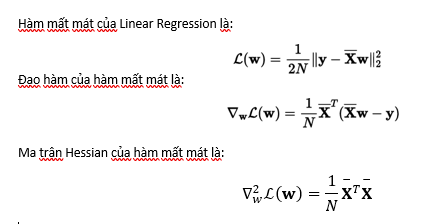

In [491]:
def loss_funtion(X, Y, w):
  y_predict = np.dot(X, w[1:]) + w[0]
  return 0.5*1/(X.shape[0])*np.linalg.norm(( Y - y_predict), ord = 2)**2

def y_predict_func(x, w):
    y_predict = np.dot(x, w[1:]) + w[0]
    return y_predict

GD WITH FIXED STEP SIZE

In [492]:
def ln_gradient_descent(x, y, learning_rate, steps, tol):
    # Check time and step
    import time
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [0]
    # Init solution w
    n1 = x.shape[1]
    n2 = x.shape[0]
    w = np.zeros(n1 + 1)
    w_list = [w]
    x = np.hstack((np.ones(n2).reshape(n2, 1) , x))
    a = np.dot(np.transpose(x), x)
    b = np.dot(np.transpose(x), y)
    # Gradient descent:
    for step in range(steps):
        gradient = 1/n2*( np.dot(a, w) - b)
        w = w - learning_rate * gradient
        w_list.append(w) 
        step += 1
        total_step.append(step)
        if (np.abs(gradient) < tol ).all() == True:
            end_time = time.time()
            total_time.append(end_time-start_time)
            print("satisfy stop condtion")
            return w,total_step,total_time,w_list
        end_time = time.time()
        total_time.append(end_time-start_time)       
    return w,total_step,total_time,w_list           

In [493]:
result_GD = ln_gradient_descent (scaled_x_train, y_train, 0.2, steps = 100000, tol = 1e-4)

satisfy stop condtion


GD WITH BACK TRACKING 

In [494]:
def ln_gradient_descent_bt(x, y, Beta, alpha, steps, tol):
    # Check time and step
    import time
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [0]
    # Init solution w
    n1 = x.shape[1]
    n2 = x.shape[0]
    w = np.zeros(n1 + 1)
    w_list = [w]
    x = np.hstack((np.ones(n2).reshape(n2, 1) , x))
    a = np.dot(np.transpose(x), x)
    b = np.dot(np.transpose(x), y)
    # Gradient descent:
    for step in range(steps):
        
        gradient = 1/n2*( np.dot(a, w) - b)
        #Backtracking
        t = 0.5
        prev_loss = loss_funtion (x[:, 1:], y, w)
        norm_2_gd = (np.linalg.norm(gradient, ord = 2))**2
        while loss_funtion(x[:, 1:], y, w - t * gradient) > prev_loss - alpha * t * norm_2_gd :
            t = Beta * t      
        else:
            w = w - t * gradient    
        w_list.append(w) 
        step += 1
        total_step.append(step)
        if (np.abs(gradient) < tol ).all() == True:
            end_time = time.time()
            total_time.append(end_time-start_time)
            print("satisfy stop condtion")
            return w,total_step,total_time,w_list
        end_time = time.time()
        total_time.append(end_time-start_time)       
    return w,total_step,total_time,w_list           

In [495]:
result_GD_BT = ln_gradient_descent_bt (scaled_x_train, y_train, Beta = 0.5, alpha = 0.5, steps = 100000, tol = 1e-4)

satisfy stop condtion


Newton’s method

In [496]:
def ln_newton(x, y, steps, tol):
    # Check time and step
    import time
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [0]
    # Init solution w
    n1 = x.shape[1]
    n2 = x.shape[0]
    w = np.zeros(n1 + 1)
    w_list = [w]
    x = np.hstack((np.ones(n2).reshape(n2, 1) , x))
    hessian = 1/n2*np.dot(np.transpose(x), x)
    inv_hessian = np.linalg.inv(hessian)
    a = np.dot(np.transpose(x), x)
    b = np.dot(np.transpose(x), y)
    # Gradient descent:
    for step in range(steps):
        gradient = 1/n2*( np.dot(a, w) - b) 
        w = w - np.dot( inv_hessian, gradient )
        w_list.append(w) 
        step += 1
        total_step.append(step)
        if (np.abs(gradient) < tol ).all() == True:
            end_time = time.time()
            total_time.append(end_time-start_time)
            print("satisfy stop condtion")
            return w,total_step,total_time,w_list
        end_time = time.time()
        total_time.append(end_time-start_time)       
    return w,total_step,total_time,w_list           

In [497]:
result_newton = ln_newton(scaled_x_train, y_train, steps = 100000, tol = 1e-4)

satisfy stop condtion


ACCELERATED GRADIENT WITH FIXED STEP SIZE

In [498]:
def accelerated_gradient(x, y, learning_rate, steps, tol):
    # Check time and step
    import time
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [0]
    # Init solution w
    n1 = x.shape[1]
    n2 = x.shape[0]
    w = np.zeros(n1 + 1)
    w_pred = w
    w_list = [w]
    x = np.hstack((np.ones(n2).reshape(n2, 1) , x))
    a = np.dot(np.transpose(x), x)
    b = np.dot(np.transpose(x), y)
    # Acc_gradient:
    for step in range(steps):
        v= w + ((step-2)/(step+1))*(w - w_pred)
        gradient = 1/n2*( np.dot(a, v) - b)
        w_new = v - learning_rate * gradient 
        w_list.append(w_new) 
        w_pred = w 
        w = w_new 
      
        step += 1
        total_step.append(step)
        if (np.abs(gradient) < tol ).all() == True:
            end_time = time.time()
            total_time.append(end_time-start_time)
            print("satisfy stop condtion")
            return w_new,total_step,total_time,w_list
        end_time = time.time()
        total_time.append(end_time-start_time)       
    return w_new,total_step,total_time,w_list           

In [499]:
result_acc_gradient = accelerated_gradient(scaled_x_train, y_train, learning_rate = 0.2, steps = 10000, tol = 1e-4)

satisfy stop condtion


ACCELERATED GRADIENT WITH BACKTRACKING

In [500]:
def acc_gradient_bt(x, y, Beta, steps, tol):
    # Check time and step
    import time
    start_time = time.time()
    step = 0
    total_time = [0]
    total_step = [0]
    # Init solution w
    n1 = x.shape[1]
    n2 = x.shape[0]
    w = np.zeros(n1 + 1)
    w_pred = w
    w_list = [w]
    x = np.hstack((np.ones(n2).reshape(n2, 1) , x))
    t = 1
    a = np.dot(np.transpose(x), x)
    b = np.dot(np.transpose(x), y)
    # Accelerated gradient:
    for step in range(steps):
        v= w + ((step-2)/(step+1))*(w - w_pred)
        gradient = 1/n2*( np.dot(a, v) - b)
        w_new = v - t * gradient
        prev_loss = loss_funtion(x[:, 1:], y, v)
        #Backtracking
        while loss_funtion(x[:, 1:], y, w_new) > prev_loss + np.dot(np.transpose(gradient), (w_new-v)) +1/(2*t) * (np.linalg.norm(w_new-v, ord = 2)**2):
          
            t = Beta * t      
            w_new = v - t * gradient
        else:      
            w_list.append(w_new) 
            w_pred = w 
            w = w_new 
        step += 1
        total_step.append(step)
        if (np.abs(gradient) < tol ).all() == True:
            end_time = time.time()
            total_time.append(end_time-start_time)
            print("satisfy stop condtion")
            return w,total_step,total_time,w_list
        end_time = time.time()
        total_time.append(end_time-start_time)       
    return w,total_step,total_time,w_list           

In [501]:
result_accgradient_BT = acc_gradient_bt (scaled_x_train, y_train, Beta = 0.5, steps = 100000, tol = 1e-4)

satisfy stop condtion


**COMPARE METHODS**

**COMPARE TIME & ITERATIONS**

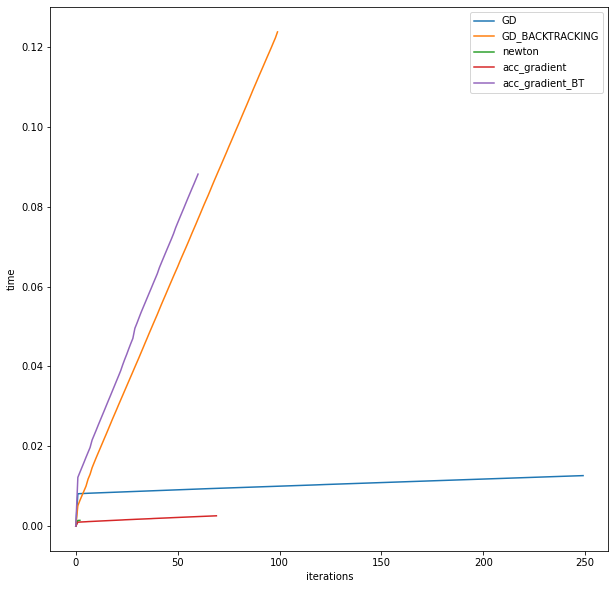

In [502]:
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.plot(result_GD[1], result_GD[2], label = "GD")
plt.plot(result_GD_BT[1], result_GD_BT[2], label = "GD_BACKTRACKING")
plt.plot(result_newton[1], result_newton[2], label = "newton")
plt.plot(result_acc_gradient[1], result_acc_gradient[2], label = "acc_gradient")
plt.plot(result_accgradient_BT[1], result_accgradient_BT[2], label = "acc_gradient_BT")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("time")
plt.show()

In [503]:
#Total time & iterations
print("GD:", "time:", result_GD[2][-1], ",iterations:", result_GD[1][-1])
print("GD_BACKTRACKING:", "time:", result_GD_BT[2][-1], ",iterations:", result_GD_BT[1][-1])
print("Newton:", "time:", result_newton[2][-1], ",iterations:", result_newton[1][-1])
print("Acc_gradient:", "time:", result_acc_gradient[2][-1], ",iterations:", result_acc_gradient[1][-1])
print("Acc_gradient_bt:", "time:", result_accgradient_BT[2][-1], ",iterations:", result_accgradient_BT[1][-1])



GD: time: 0.012645959854125977 ,iterations: 249
GD_BACKTRACKING: time: 0.12381958961486816 ,iterations: 99
Newton: time: 0.0014357566833496094 ,iterations: 2
Acc_gradient: time: 0.002576112747192383 ,iterations: 69
Acc_gradient_bt: time: 0.08819222450256348 ,iterations: 60


**COMPARE COSTFUNCTION**

Text(0, 0.5, 'loss_function')

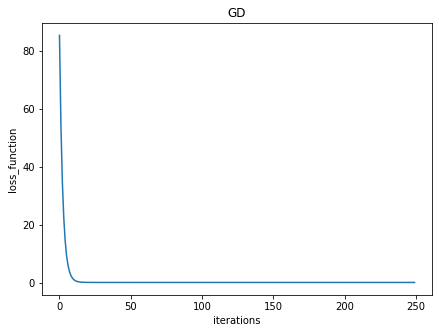

In [504]:
#cost function of GD
fig = plt.gcf()
fig.set_size_inches(7,5)
loss_function_list_GD = [loss_funtion(scaled_x_train, y_train, w) for w in result_GD[3]]
plt.plot(result_GD[1],loss_function_list_GD )
plt.title("GD")
plt.xlabel("iterations")
plt.ylabel("loss_function")

Text(0, 0.5, 'loss_function')

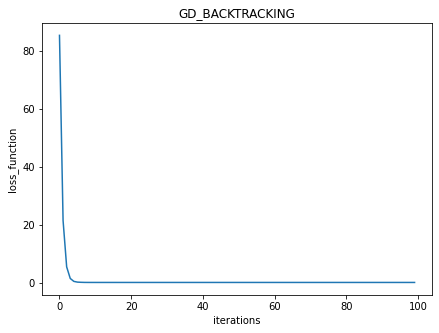

In [505]:
#cost function of GD_BACKTRACKING
fig = plt.gcf()
fig.set_size_inches(7,5)
loss_function_list_GDBT = [loss_funtion(scaled_x_train, y_train, w) for w in result_GD_BT[3]]
plt.plot(result_GD_BT[1],loss_function_list_GDBT )
plt.title("GD_BACKTRACKING")
plt.xlabel("iterations")
plt.ylabel("loss_function")

Text(0, 0.5, 'loss_function')

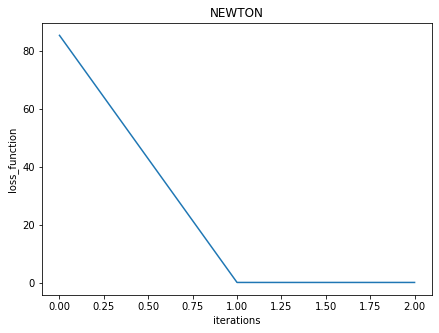

In [506]:
#cost function of newton
fig = plt.gcf()
fig.set_size_inches(7,5)
loss_function_list_newton = [loss_funtion(scaled_x_train, y_train, w) for w in result_newton[3]]
plt.plot(result_newton[1],loss_function_list_newton )
plt.title("NEWTON")
plt.xlabel("iterations")
plt.ylabel("loss_function")

Text(0, 0.5, 'loss_function')

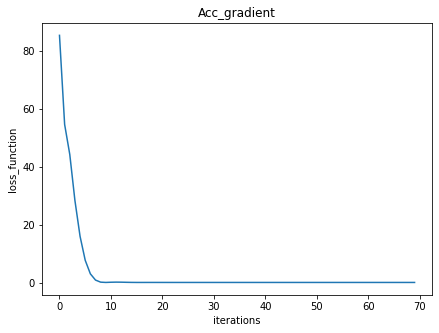

In [507]:
#cost function of Acc_G
fig = plt.gcf()
fig.set_size_inches(7,5)
loss_function_list_acc_gradient = [loss_funtion(scaled_x_train, y_train, w) for w in result_acc_gradient[3]]
plt.plot(result_acc_gradient[1],loss_function_list_acc_gradient )
plt.title("Acc_gradient")
plt.xlabel("iterations")
plt.ylabel("loss_function")

Text(0, 0.5, 'loss_function')

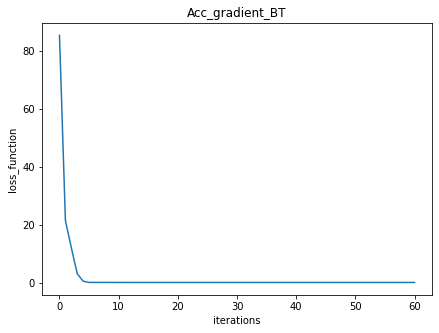

In [508]:
#cost function of Acc_Gradient_BT:
fig = plt.gcf()
fig.set_size_inches(7,5)
loss_function_list_acc_gradient_bt = [loss_funtion(scaled_x_train, y_train, w) for w in result_accgradient_BT[3]]
plt.plot(result_accgradient_BT[1],loss_function_list_acc_gradient_bt )
plt.title("Acc_gradient_BT")
plt.xlabel("iterations")
plt.ylabel("loss_function")


In [509]:
#Cost_function compare
print("GD:", loss_function_list_GD[-1])
print("GD_BACKTRACKING:", loss_function_list_GDBT[-1])
print("NEWTON:", loss_function_list_newton[-1])
print("acc_gradient:", loss_function_list_acc_gradient[-1])
print("acc_gradient_bt:", loss_function_list_acc_gradient_bt[-1])


GD: 0.059546999934271636
GD_BACKTRACKING: 0.059546995805174335
NEWTON: 0.059546927806352415
acc_gradient: 0.05954695069782798
acc_gradient_bt: 0.05954697511569573


In [510]:
#Cost_function (MSE) of test_samples:
print("GD:", mean_squared_error(y_test, y_predict_func(scaled_x_test, result_GD[0]))/2)
print("GD_BACKTRACKING:", mean_squared_error(y_test, y_predict_func(scaled_x_test, result_GD_BT[0]))/2)
print("NEWTON:", mean_squared_error(y_test, y_predict_func(scaled_x_test, result_newton[0]))/2)
print("acc_gradient:", mean_squared_error(y_test, y_predict_func(scaled_x_test, result_acc_gradient[0]))/2)
print("acc_gradient_bt:", mean_squared_error(y_test, y_predict_func(scaled_x_test, result_accgradient_BT[0]))/2)


GD: 0.05975088645019576
GD_BACKTRACKING: 0.05975087443205675
NEWTON: 0.059750738599341484
acc_gradient: 0.05975021599545672
acc_gradient_bt: 0.05975078305104824
